In [2]:
import numpy as np 
import pandas as pd 

In [22]:
news = pd.read_csv(r'https://github.com/DaryaTereshchenko/UKR-MODELS/blob/3968ad517d7a0435dae307facda48880bf74fdc1/data/news_5k.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news['class'] = "news"

fiction = pd.read_csv(r'https://github.com/DaryaTereshchenko/UKR-MODELS/blob/3968ad517d7a0435dae307facda48880bf74fdc1/data/fiction_5k.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
fiction['class'] = "fiction"

wiki = pd.read_csv(r'https://github.com/DaryaTereshchenko/UKR-MODELS/blob/3968ad517d7a0435dae307facda48880bf74fdc1/data/wiki_5k.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
wiki['class'] = "wiki"

law = pd.read_csv(r'https://github.com/DaryaTereshchenko/UKR-MODELS/blob/3968ad517d7a0435dae307facda48880bf74fdc1/data/law_5k.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
law['class'] = "law"

In [23]:
print(news.shape)
print(fiction.shape)
print(wiki.shape)
print(law.shape)

(5041, 103)
(4999, 103)
(5035, 103)
(5019, 103)


In [ ]:
COLUMNS = list(news.columns)

In [25]:
frames = [news, fiction, wiki, law]
data = pd.concat(frames)
data = data.sample(frac = 1)
display(data)

,CODE,L_TYPE_TOKEN_RATIO_LEMMAS,L_PROPER_NAME,L_PERSONAL_NAME,L_PUNCT,L_PUNCT_COM,L_PUNCT_SEMC,L_PUNCT_COL,L_PUNCT_DASH,L_CONT_A,...,SY_NON_FINITE,SY_QUOTATIONS,SY_EXCLAMATION,SY_QUESTION,SY_ELLIPSES,SY_POSITIONING,SY_CONDITIONAL,SY_IMPERATIVE,SY_AMPLIFIED_SENT,class
1356,2218,0.715170,0.092879,0.046440,0.058824,0.0,0.0,0.0,0.000000,0.693498,...,0.024768,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,news
2519,3270,0.728097,0.024169,0.024169,0.063444,0.0,0.0,0.0,0.000000,0.661631,...,0.003021,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.021148,0.0,fiction
2010,2807,0.409871,0.004292,0.000000,0.049356,0.0,0.0,0.0,0.000000,0.751073,...,0.064378,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002146,0.0,law
3847,4472,0.744792,0.036458,0.020833,0.109375,0.0,0.0,0.0,0.000000,0.619792,...,0.031250,0.0,0.0,0.0,0.005208,0.000000,0.010417,0.020833,0.0,fiction
4837,815,0.727811,0.062130,0.020710,0.079882,0.0,0.0,0.0,0.000000,0.727811,...,0.014793,0.0,0.0,0.0,0.000000,0.002959,0.000000,0.000000,0.0,news
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1370,0.669456,0.008368,0.008368,0.083682,0.0,0.0,0.0,0.000000,0.610879,...,0.008368,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.004184,0.0,fiction
2090,288,0.551601,0.231317,0.177936,0.067616,0.0,0.0,0.0,0.000000,0.779359,...,0.192171,0.0,0.0,0.0,0.003559,0.000000,0.000000,0.000000,0.0,wiki
3535,419,0.681452,0.040323,0.024194,0.080645,0.0,0.0,0.0,0.000000,0.633065,...,0.008065,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.016129,0.0,fiction
4173,4754,0.407246,0.001449,0.000000,0.063768,0.0,0.0,0.0,0.000000,0.642029,...,0.014493,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,law


In [26]:
X = data.drop('class', axis=1)
y = data['class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [28]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(X_test), columns = X.columns)

In [32]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=66)

# Training the model on the training dataset
# fir function is used to train the model using the training sets as parameters
clf.fit(normed_train_data, y_train)

#performing predictions on the test dataset
y_pred = clf.predict(normed_test_data)

# print (clf.score(normed_train_data, y_train))
print(clf.score(normed_test_data, y_test))

#metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

0.9853197312764369

ACCURACY OF THE MODEL:  0.9853197312764369


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

     fiction       0.99      1.00      0.99       982
         law       0.98      0.98      0.98      1000
        news       0.99      0.99      0.99      1048
        wiki       0.97      0.98      0.97       989

    accuracy                           0.99      4019
   macro avg       0.99      0.99      0.99      4019
weighted avg       0.99      0.99      0.99      4019





In [34]:
con_mat_df = confusion_matrix(y_test, y_pred)
con_mat_df = con_mat_df.astype('float') / con_mat_df.sum(axis=1)[:, np.newaxis]

In [40]:
import matplotlib.pyplot as plt

[[0.99898167 0.         0.00101833 0.        ]
 [0.         0.977      0.001      0.022     ]
 [0.00667939 0.         0.98854962 0.00477099]
 [0.00303337 0.01516684 0.00505561 0.97674419]]


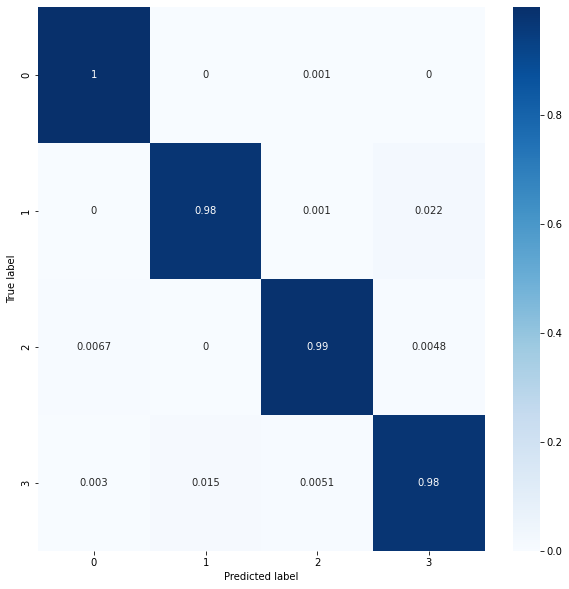

In [41]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(con_mat_df)

# Feature Importance

In [43]:
data.columns[:-1]

Index(['CODE', 'L_TYPE_TOKEN_RATIO_LEMMAS', 'L_PROPER_NAME', 'L_PERSONAL_NAME',
       'L_PUNCT', 'L_PUNCT_COM', 'L_PUNCT_SEMC', 'L_PUNCT_COL', 'L_PUNCT_DASH',
       'L_CONT_A',
       ...
       'SY_PARATAXIS', 'SY_NON_FINITE', 'SY_QUOTATIONS', 'SY_EXCLAMATION',
       'SY_QUESTION', 'SY_ELLIPSES', 'SY_POSITIONING', 'SY_CONDITIONAL',
       'SY_IMPERATIVE', 'SY_AMPLIFIED_SENT'],
      dtype='object', length=102)

In [42]:
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feature_names = data.columns[:-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feature_names[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) L_CONT_T                       0.083614
 2) L_TYPE_TOKEN_RATIO_LEMMAS      0.080569
 3) POS_NOUN                       0.049280
 4) L_GEN_CASE                     0.046826
 5) POS_PRO                        0.045328
 6) L_FUNC_T                       0.045168
 7) L_RELATIVE_ADJ                 0.042707
 8) POS_VERB                       0.037514
 9) L_PRON_PRS                     0.032960
10) L_PROPER_NAME                  0.028854
11) VF_PAST_IND_PERFECT            0.028295
12) VF_ALL_VERB_PERFECT            0.025291
13) L_PERSONAL_NAME                0.023383
14) VF_TRANSITIVE                  0.022855
15) L_MASCULINE_NAMES              0.022417
16) L_FUNC_A                       0.021433
17) L_INANIM_NOUN                  0.019615
18) VF_ROOT_VERB_PERFECT           0.019202
19) L_GIVEN_NAMES                  0.019133
20) L_SURNAMES                     0.018826
21) VF_INFINITIVE                  0.016523
22) POS_ADV                        0.014711
23) POS_ADJ                     